In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pickle as pk

In [2]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('OutliersRemoved.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,22,5,2491,9,12,4,0,1,4,0,39,2,0
1,33,4,2727,9,12,2,3,0,4,0,12,2,0
2,21,2,13188,11,8,0,5,1,4,0,39,2,0
3,36,2,14354,1,6,2,5,0,2,0,39,2,0
4,11,2,18120,9,12,2,9,5,2,1,39,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,10,2,15471,7,11,2,12,5,4,1,37,2,0
29989,23,2,7555,11,8,2,6,0,4,0,39,2,1
29990,41,2,7377,11,8,6,0,4,4,1,39,2,0
29991,5,2,12060,11,8,4,0,3,4,0,19,2,0


In [5]:
df_new = df.copy()

In [6]:
y = df_new.salary

In [7]:
X = df_new.drop(columns=['salary'])

In [8]:
y

0        0
1        0
2        0
3        0
4        0
        ..
29988    0
29989    1
29990    0
29991    0
29992    1
Name: salary, Length: 29993, dtype: int64

In [9]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country
0,22,5,2491,9,12,4,0,1,4,0,39,2
1,33,4,2727,9,12,2,3,0,4,0,12,2
2,21,2,13188,11,8,0,5,1,4,0,39,2
3,36,2,14354,1,6,2,5,0,2,0,39,2
4,11,2,18120,9,12,2,9,5,2,1,39,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29988,10,2,15471,7,11,2,12,5,4,1,37,2
29989,23,2,7555,11,8,2,6,0,4,0,39,2
29990,41,2,7377,11,8,6,0,4,4,1,39,2
29991,5,2,12060,11,8,4,0,3,4,0,19,2


In [10]:
def vif_score(x):
    sc = StandardScaler()
    arr = sc.fit_transform(x)
    return pd.DataFrame([[x.columns[i] , variance_inflation_factor(arr , i)] for i in range(arr.shape[1])] , columns = ['Features' , 'VIF'])

In [11]:
vif_score(X)

,Features,VIF
0,age,1.168518
1,workclass,1.015131
2,fnlwgt,1.010911
3,education,1.142876
4,education-num,1.188937
5,marital-status,1.139600
6,occupation,1.019121
7,relationship,1.677921
8,race,1.137678
9,sex,1.568248


Here we can see that no independent columns are dependent on each other , so their is no multicolinearity.

Now as theri is diepersion of data between the columns , so now we will perform sclaing to bring the data in one common range.

In [12]:
sc = StandardScaler()

In [13]:
X = sc.fit_transform(X)

In [14]:
X

array([[ 0.06305317,  2.93906515, -1.29416899, ..., -0.69290152,
        -0.08020358,  0.16049526],
       [ 0.92505499,  1.8901684 , -1.25256685, ..., -0.69290152,
        -2.38542956,  0.16049526],
       [-0.01531064, -0.20762511,  0.59150074, ..., -0.69290152,
        -0.08020358,  0.16049526],
       ...,
       [ 1.5519654 , -0.20762511, -0.43286374, ...,  1.44320653,
        -0.08020358,  0.16049526],
       [-1.26913147, -0.20762511,  0.39265663, ..., -0.69290152,
        -1.78777838,  0.16049526],
       [ 1.08178259,  0.84127164,  1.20865786, ...,  1.44320653,
        -0.08020358,  0.16049526]])

So here we can see that the data is scaled.

Now perfroming train test split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=1000)

In [16]:
X_train.shape

(22494, 12)

In [17]:
X_test.shape

(7499, 12)

In [18]:
y_train.shape

(22494,)

In [19]:
y_test.shape

(7499,)

So now the data is being scaled and also test train split is being done, so now the data is ready to be sent to ML CLASSIFICATION ALGORITHMS.

Also we will have to save the data till now so that we don't have to repeat the steps again.

In [20]:
pk.dump(sc , open('adult_scaled.pickle' , 'wb'))

# Model Training and Testing

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , roc_auc_score , roc_curve  , accuracy_score

In [22]:
logi = LogisticRegression(penalty='elasticnet',solver='saga'  , max_iter=100 ,l1_ratio=0.5)

In [23]:
logi.fit(X_train , y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [24]:
y_predict = logi.predict(X_test)

In [25]:
y_predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
print("Score of Train Dataset {}".format(logi.score(X_train , y_train)))
print("Score of Test Dataset {}".format(logi.score(X_test , y_test)))

Score of Train Dataset 0.7999466524406509
Score of Test Dataset 0.8081077476996933


In [27]:
confusionMatrix = confusion_matrix(y_test , y_predict)

In [28]:
confusionMatrix

array([[5284,  415],
       [1024,  776]], dtype=int64)

So after passing the y_test and y_predicted values to the confusion matrix we got the following results.

True Positive : 5284 
False Positive : 415
False Negative : 1024
True Positive : 776

In [29]:
TP = confusionMatrix[0][0]
FP = confusionMatrix[0][1]
FN = confusionMatrix[1][0]
TN = confusionMatrix[1][1]

In [30]:
accuracy = (TP+TN)/(TP+TN+FP+FN)

In [31]:
accuracy

0.8081077476996933

In [32]:
precision = (TP)/(TP+FP)

In [33]:
precision

0.927180207053869

In [34]:
recall = (TP)/(TP+FN)

In [35]:
recall

0.8376664552948636

In [36]:
f1_score = 2*(precision*recall)/(precision+recall)

In [37]:
f1_score

0.8801532439410343

In [38]:
auc = roc_auc_score(y_test , y_predict)

In [39]:
auc

0.67914565908249

In [40]:
fpr , tpr , thresolds = roc_curve(y_test , y_predict)

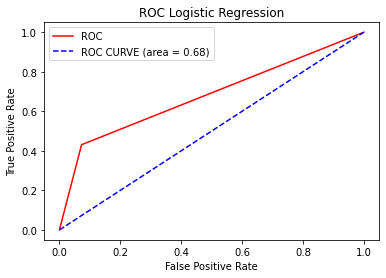

In [41]:
plt.plot(fpr , tpr , color = 'red' , label = 'ROC')
plt.plot([0,1] , [0,1] , color='blue' , linestyle='--' , label='ROC CURVE (area = %0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Logistic Regression")
plt.legend()
plt.show()

## Decision Trees

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'country', 'salary'],
      dtype='object')

In [44]:
X = df.drop(['salary'] , axis=1)

In [45]:
y = df['salary']

In [46]:
feature_names = list(X.columns)

In [47]:
feature_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours-per-week',
 'country']

In [48]:
class_name = list(y.unique())

In [49]:
class_name

[0, 1]

In [50]:
dTree = DecisionTreeClassifier()

In [51]:
dTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [52]:
dPredict = dTree.predict(X_test)

In [53]:
dScore = dTree.score(X_test , y_test)

In [54]:
dScore

0.7778370449393253

In decision trees there are two main parameters ,which are gini and entropy. Gini shows how impure the data is whereas Entropy shows how pure the data is. We can use any of the two parameters in our decision tree model. 
So lets check which one will be a best fit for our model based on the dataset.

We will perform hyperparameter tunning by using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
dTree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [57]:
grid_parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']    
}

In [58]:
grid_search = GridSearchCV(estimator=dTree , param_grid=grid_parameter , n_jobs=-1 )

In [59]:
grid_search.fit(X_train , y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [60]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'splitter': 'best'}

So now we know that which parameters to use for our Decision Tree Model.

In [61]:
d_tree_final = DecisionTreeClassifier(criterion='entropy' , max_depth=7 , min_samples_leaf=8 , min_samples_split=2 , splitter='best')
d_tree_final.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8)

In [62]:
yPredictDT = d_tree_final.predict(X_test)

In [63]:
d_tree_final.score(X_test , y_test)

0.8301106814241899

In [64]:
dTree_confusion_matrix = confusion_matrix(y_test , yPredictDT)

In [65]:
dTree_confusion_matrix

array([[5196,  503],
       [ 771, 1029]], dtype=int64)

In [66]:
TP_dt = dTree_confusion_matrix[0][0]
FP_dt = dTree_confusion_matrix[0][1]
FN_dt = dTree_confusion_matrix[1][0]
TN_dt = dTree_confusion_matrix[1][1]

In [67]:
accuracy_dt = (TP_dt + TN_dt)/(TP_dt+TN_dt+FN_dt+FP_dt)
accuracy_dt

0.8301106814241899

In [68]:
auc_dt = roc_auc_score(y_test , yPredictDT)
auc_dt

0.7417027841141721

In [69]:
fpr_dt , tpr_dt , thresolds_dt = roc_curve(y_test , yPredictDT)

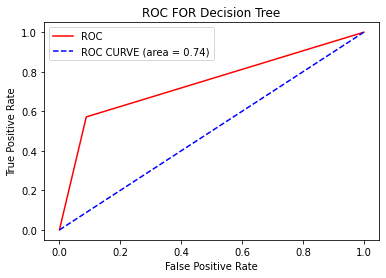

In [70]:
plt.plot(fpr_dt , tpr_dt , color='red' , label='ROC')
plt.plot([0,1] , [0,1] , color='blue' , linestyle ='--' , label=("ROC CURVE (area = %0.2f)" %auc_dt))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC FOR Decision Tree')
plt.legend()
plt.show()

## Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
naive = GaussianNB()

In [73]:
naive_c = naive.fit(X_train , y_train)

In [135]:
print("Score of Gaussian Naive Baeys in Train Dataset {}".format(naive_c.score(X_train , y_train)))
print("Score of Gaussian Naive Baeys in Test Dataset {}".format(naive_c.score(X_test , y_test)))

Score of Gaussian Naive Baeys in Train Dataset 0.7732728727660709
Score of Gaussian Naive Baeys in Test Dataset 0.7834377917055607


In [74]:
yNaivePredict = naive_c.predict(X_test)

In [75]:
naive_confusion_matrix = confusion_matrix(y_test , yNaivePredict)

In [76]:
naive_confusion_matrix

array([[4560, 1139],
       [ 485, 1315]], dtype=int64)

In [77]:
TP_nb = naive_confusion_matrix[0][0]
FP_nb = naive_confusion_matrix[0][1]
FN_nb = naive_confusion_matrix[1][0]
TN_nb = naive_confusion_matrix[1][1]

In [78]:
accuracy_nb = (TP_nb + TN_nb)/(TP_nb + FP_nb + FN_nb + TN_nb)
accuracy_nb

0.7834377917055607

In [79]:
auc_nb = roc_auc_score(y_test , yNaivePredict)

In [80]:
auc_nb

0.7653479655300149

In [81]:
fpr_nb , tpr_nb , thresolds_nb = roc_curve(y_test , yNaivePredict)

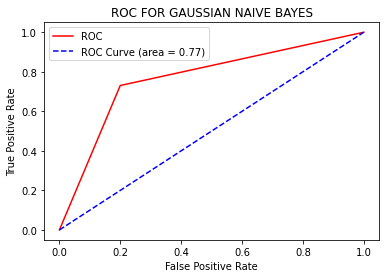

In [82]:
plt.plot(fpr_nb ,tpr_nb , color = 'red' , label = 'ROC')
plt.plot([0,1] , [0,1] , color = 'blue' , linestyle = '--' ,label = 'ROC Curve (area = %.2f)' %auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC FOR GAUSSIAN NAIVE BAYES")
plt.legend()

## KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier()

In [85]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [86]:
print("Score of KNN on Train Dataset {}".format(knn.score(X_train , y_train)))
print("Score of KNN on Test Dataset {}".format(knn.score(X_test , y_test)))

Score of KNN on Train Dataset 0.863919267360185
Score of KNN on Test Dataset 0.8202426990265369


In [87]:
y_predictaKNN = knn.predict(X_test)

Here in KNN we have multiple algorithms , which we can use and apply on our dataset. So to select which algorithm is the best , we need to perfrom hyperparameter tunnig.

In [88]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [89]:
grid_params_knn = {
    'algorithm' : ['ball_tree' , 'kd_tree' , 'brute'],
    'n_neighbors' : range(1,32)
}

In [90]:
grid_seach_knn = GridSearchCV(estimator= knn , param_grid= grid_params_knn ,n_jobs=-1 )

In [91]:
grid_seach_knn.fit(X_train , y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 32)})

In [92]:
grid_seach_knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 24}

In [93]:
knn_final = KNeighborsClassifier(algorithm='ball_tree' , n_jobs=-1 , n_neighbors=24)

In [94]:
knn_final.fit(X_train , y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=24)

In [95]:
print("Score of KNN on Train Dataset {}".format(knn_final.score(X_train , y_train)))
print("Score of KNN on Test Dataset {}".format(knn_final.score(X_test , y_test)))

Score of KNN on Train Dataset 0.8336889837289944
Score of KNN on Test Dataset 0.8230430724096546


In [96]:
y_predictKNN = knn_final.predict(X_test)

In [97]:
knn_confusion_matrix = confusion_matrix(y_test , y_predictKNN)

In [98]:
knn_confusion_matrix

array([[5182,  517],
       [ 810,  990]], dtype=int64)

In [99]:
TP_knn = knn_confusion_matrix[0][0]
FP_knn = knn_confusion_matrix[0][1]
FN_knn = knn_confusion_matrix[1][0]
TN_knn = knn_confusion_matrix[1][1]

In [100]:
accuracy_knn = (TP_knn + TN_knn)/(TP_knn + FN_knn + FP_knn + TN_knn)
accuracy_knn

0.8230430724096546

In [101]:
auc_knn = roc_auc_score(y_test , y_predictKNN)
auc_knn

0.7296411651166871

In [102]:
fpr_knn , tpr_knn, thresolds_knn = roc_curve(y_test , y_predictKNN)

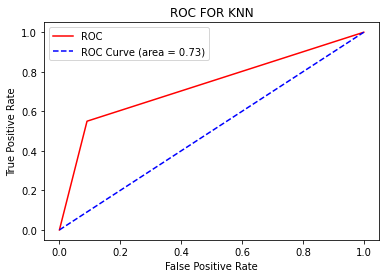

In [103]:
plt.plot(fpr_knn ,tpr_knn , color = 'red' , label = 'ROC')
plt.plot([0,1] , [0,1] , color = 'blue' , linestyle = '--' ,label = 'ROC Curve (area = %.2f)' %auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC FOR KNN")
plt.legend()

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train , y_train)

RandomForestClassifier()

In [107]:
print("Score of RF on Train Dataset {}".format(rf.score(X_train , y_train)))
print("Score of RF on Test Dataset {}".format(rf.score(X_test , y_test)))

Score of RF on Train Dataset 0.9999555437005424
Score of RF on Test Dataset 0.8269102547006267


In [108]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

We will perfrom hyperparameter tunning for Random Forest.

In [109]:
grid_params_rf = {
    "criterion" : ["gini" , "entropy"],
    "max_features" : ["auto" , "sqrt" , "log2"],
    "class_weight" : ["balanced" , "balanced_subsample"],
    }

In [112]:
grid_search_rf = GridSearchCV(rf , grid_params_rf , n_jobs=-1 )
grid_search_rf.fit(X_train , y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [113]:
grid_search_rf.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}

In [114]:
rf_final = RandomForestClassifier(criterion="entropy" , max_features="auto" , class_weight="balanced" , random_state=100)

In [115]:
rf_final.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=100)

In [116]:
print("Score of FINAL RF on Train Dataset {}".format(rf_final.score(X_train , y_train)))
print("Score of FINAL RF on Test Dataset {}".format(rf_final.score(X_test , y_test)))

Score of FINAL RF on Train Dataset 1.0
Score of FINAL RF on Test Dataset 0.8287771702893719


In [117]:
y_predictRF = rf_final.predict(X_test)

In [118]:
rf_confusion_matrix = confusion_matrix(y_test , y_predictRF)

In [119]:
rf_confusion_matrix

array([[5150,  549],
       [ 735, 1065]], dtype=int64)

In [120]:
TP_rf = rf_confusion_matrix[0][0]
FP_rf = rf_confusion_matrix[0][1]
FN_rf = rf_confusion_matrix[1][0]
TN_rf = rf_confusion_matrix[1][1]

In [121]:
accuracy_rf = (TP_rf + TN_rf)/(TP_rf + FN_rf + FP_rf + TN_rf)
accuracy_rf

0.8287771702893719

## AdaBoost Classifier

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
ada = AdaBoostClassifier()

In [125]:
ada.fit(X_train , y_train)

AdaBoostClassifier()

In [126]:
print("Score of ADA on Train Dataset {}".format(ada.score(X_train , y_train)))
print("Score of ADA on Test Dataset {}".format(ada.score(X_test , y_test)))

Score of ADA on Train Dataset 0.8322219258468925
Score of ADA on Test Dataset 0.8409121216162155


In [127]:
ada.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [128]:
grid_params_ada = {
    'algorithm' : ['SAMME', 'SAMME.R'],
    'n_estimators' : [10 , 50 , 100 , 150 , 200 , 250 , 300],
    'learning_rate' : [0.5 , 1.0 , 1.5 , 2.0 , 2.5 , 3.0]
}

In [129]:
grid_search_ada = GridSearchCV(ada , grid_params_ada , n_jobs=-1)
grid_search_ada.fit(X_train , y_train)

C:\Users\AAKASH\anaconda3.1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80657065 0.81412837 0.81955199 0.82288608 0.82550919 0.82666504
 0.82582024 0.81346134 0.82421971 0.82657592 0.82724272 0.8268426
 0.82724274 0.82777617 0.80741523 0.82933231 0.83155496 0.83075479
 0.83164387 0.83168827 0.83155487 0.59855952 0.59855952 0.59855952
 0.59855952 0.59855952 0.59855952 0.59855952 0.59855952        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.81603978 0.82702056 0.83128826 0.83119939 0.83213292 0.8321774
 0.83173285 0.81577309 0.83048799 0.83177729 0.83235529 0.83115491
 0.83115486 0.83062139 0.81074974 0.83039911 0.83115491 0.83017682
 0.83066587 0.83164397 0.83048804 0.73006066 0.73668583 0.73006066
 0.73668583 0.73668583 0.73668583 0.73668583 0.26704843 0.26704843
 0.26704843 0.26704843 0.26704843 0.26704843 0.26704

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300]})

In [130]:
grid_search_ada.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}

In [134]:
ada_final = AdaBoostClassifier(algorithm='SAMME.R' , learning_rate=1.0 , n_estimators=150 )
ada_final.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=150)

In [132]:
print("Score of ADA FINAL on Train Dataset {}".format(ada_final.score(X_train , y_train)))
print("Score of ADA FINAL on Test Dataset {}".format(ada_final.score(X_test , y_test)))

Score of ADA FINAL on Train Dataset 0.8346670223170624
Score of ADA FINAL on Test Dataset 0.8413121749566609


Now as I have tested the dataset on every model , so now it's time to compare the accuracy of the model.

In [136]:
model_list = [logi,d_tree_final,naive_c,knn_final,rf_final,ada_final]
model_name = ['Logistic Regression' , 'Decission Tree' , 'Naive Bayes' , 'KNN' , 'Random Forest' , 'AdaBoost']
Test_Score = []
Train_Score = []

for i in model_list:
    Train_Score.append(i.score(X_train , y_train))
    Test_Score.append(i.score(X_test , y_test))

Output = pd.DataFrame()
Output['Model Name'] = model_name
Output['Train Score'] = Train_Score
Output['Test Score'] = Test_Score

In [137]:
Output

,Model Name,Train Score,Test Score
0,Logistic Regression,0.799947,0.808108
1,Decission Tree,0.832533,0.830111
2,Naive Bayes,0.773273,0.783438
3,KNN,0.833689,0.823043
4,Random Forest,1.000000,0.828777
5,AdaBoost,0.834667,0.841312


Text(0.5, 1.0, 'Final Scores of the Models')

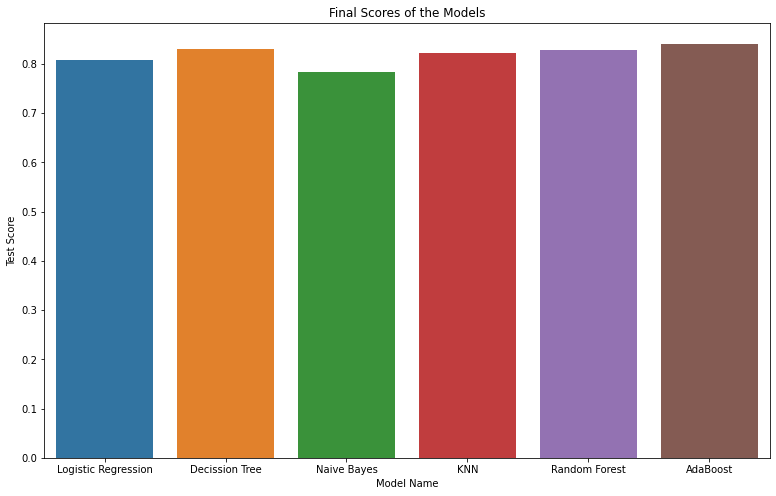

In [146]:
plt.figure(figsize = (13,8))
sns.barplot(data = Output , x='Model Name' , y = 'Test Score')
plt.title("Final Scores of the Models")

So now we can clearly identify that **AdaBoost Classifier** is giving the best accuracy. So we will go ahead with that algorithm.

In [147]:
#Saving the model in using pickle, so that we can use it forward in our webapp.

pk.dump(ada_final , open('final_model.pickle', 'wb'))